In [1]:
# need to install ipympl and restart jupyter notebook
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
from utils import yamlread

import conf_mgt
from test import sample_now, main, build_conf
import lpips
import os

In [3]:
def stop(p, ani):
    p.terminate()
    ani.event_source.stop()

## Super-resolve

In [8]:
file = r"experiments/super_resolve/gts/inet256/mask/000000.png"

import cv2

img = cv2.imread(file)
print(img.shape)
print(img[0,0], img[0, 1], img[1, 0], img[1,1])

(256, 256, 3)
[0 0 0] [0 0 0] [0 0 0] [255 255 255]


In [5]:
file = r"experiments/image_size_inet/gts/inet256/img/000000.png"


import cv2

img = cv2.imread(file)
img0 = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)

cv2.imwrite("128.png", img0)


True

In [18]:
file = "128.png"
import numpy as np

img = cv2.imread(file)
mask = np.zeros((256,256,3))
for x in range(0, 256,2):
    i0 = x % 2
    mask[x, i0::2, :] = [255, 255, 255]
cv2.imwrite("mask.png", mask)

True

In [20]:
img_new = np.zeros((256,256,3))
for x in range(0, 256, 2):
    i0 = x % 2
    img_new[x, i0::2, :] = img[x//2, :128, :]
cv2.imwrite("gt.png", img_new)

True

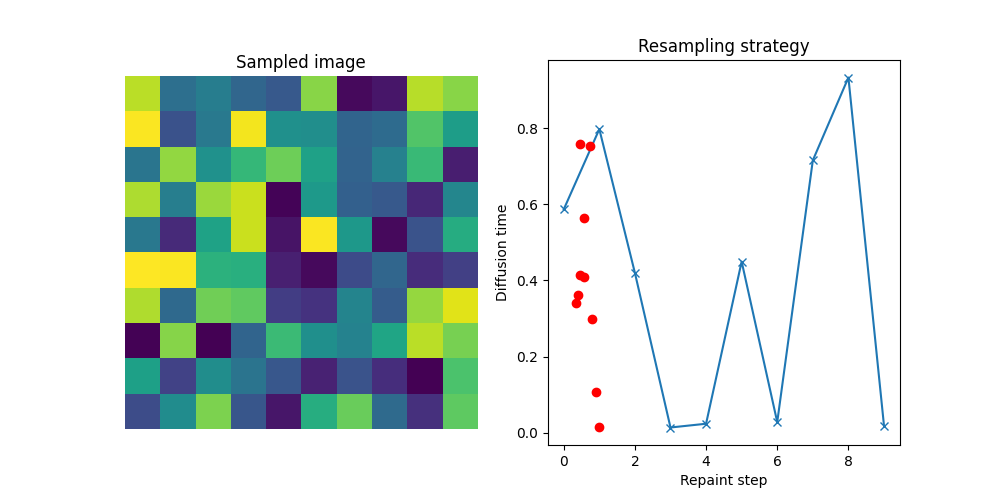

Done


In [7]:
conf = build_conf("super_resolve", "inet256", 10, 1, jump_length=1, jump_n_sample=1)
p, ani = main(conf)

In [ ]:
# go to iteration 40, and then try different seeds
# to see where they bring

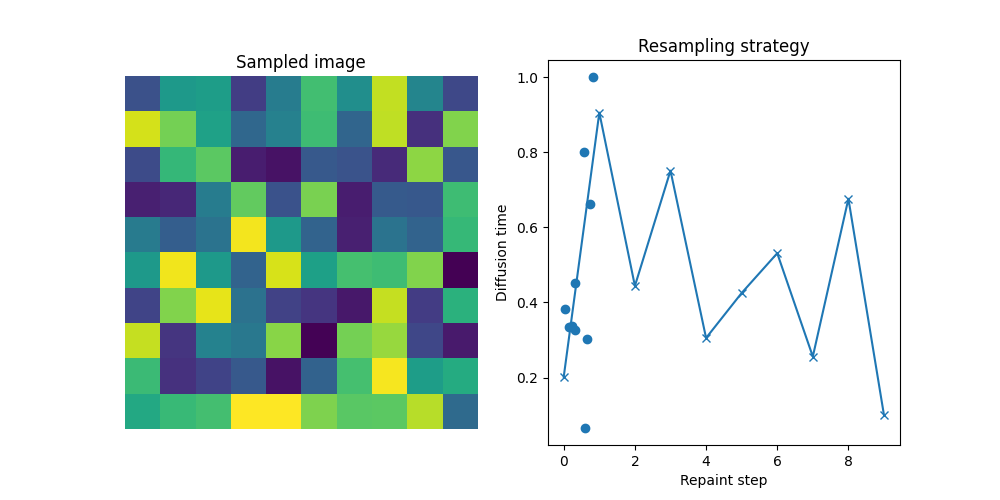

In [16]:
conf_arg = conf_mgt.conf_base.Default_Conf()
conf_arg.update(yamlread('confs/face_example.yml'))
conf_arg['seed'] = 1
conf_arg['reload'] = True
conf_arg['save_model'] = 'save_jn.pkl'
conf_arg['save_idx'] = []
conf_arg['stop_it'] = []
p, ani = main(conf_arg)

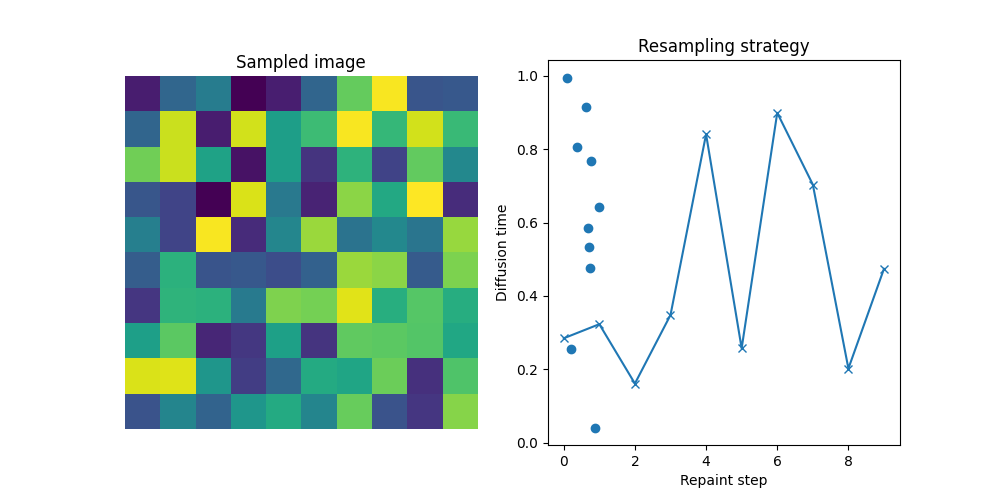

In [18]:
conf_arg = conf_mgt.conf_base.Default_Conf()
conf_arg.update(yamlread('confs/face_example.yml'))
conf_arg['seed'] = 1
conf_arg['reload'] = True
conf_arg['save_model'] = 'save_jn.pkl'
conf_arg['save_idx'] = []
conf_arg['stop_it'] = []
conf_arg['manual_times'] = [5,4,3,4,5,4,3,2,1,0,-1]
p, ani = main(conf_arg)

### Resizing images

In [8]:
import cv2
types = 'gt_keep_masks/genhalf'
types2 = 'gt_keep_masks/genhalf3'
# types = 'gts/inet256'
for i in range(8):
    img = cv2.imread(f'data/datasets/{types}/00000{i}.png', cv2.IMREAD_UNCHANGED)
    
    print('Original Dimensions : ',img.shape)
    
    width = int(img.shape[1] * 1 / 4)
    height = int(img.shape[0] * 1 / 4)
    dim = (width, height)
    
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    print('Resized Dimensions : ',resized.shape)

    cv2.imwrite(f'data/datasets/{types2}/00000{i}.png', resized)
    
    # cv2.imshow("Resized image", resized)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (64, 64, 3)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (64, 64, 3)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (64, 64, 3)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (64, 64, 3)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (64, 64, 3)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (64, 64, 3)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (64, 64, 3)
Original Dimensions :  (256, 256, 3)
Resized Dimensions :  (64, 64, 3)


In [ ]:
params = {
    "n": 5,
    "seed": 1,
    "total_it": 10,
    "jump_length": 5,
    "jump_n_sample": 5,
    "parallel": False,
}

processes = []
for total_it in [11,12]:
    params["total_it"] = total_it
    conf = build_conf("image_size_inet", "inet64", **params)
    processes.append(main(conf))
    print("Started process", processes[-1][0].pid)

In [ ]:
for p, queue in processes:    
    while not queue.empty():
        data = queue.get_nowait()
        if isinstance(data, tuple):
            if not isinstance(data[0], str):
                idx = data[0]
                print(f"p: {p.pid}, idx: {idx}")

### Comparing ImageNet 64 with ImageNet 256: time and performance

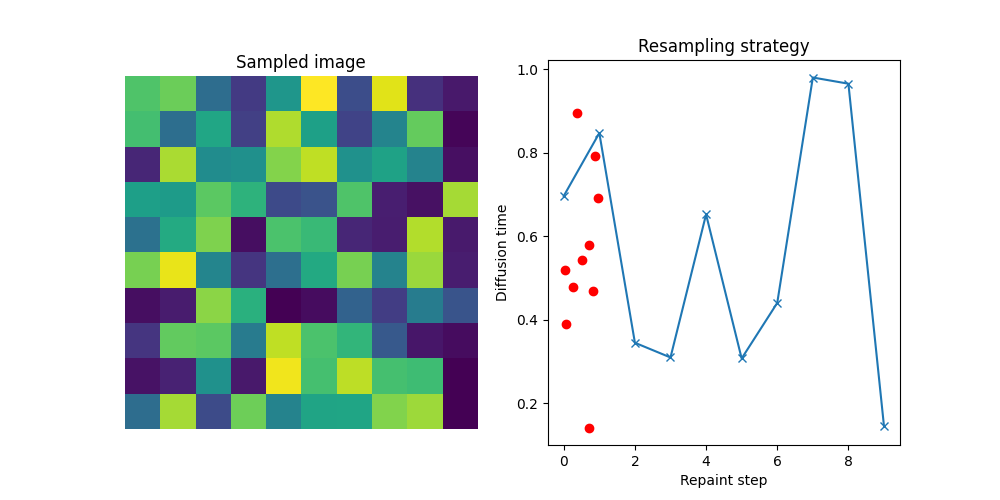

Done


In [3]:
params = {
    "n": 5,
    "seed": 1,
    "total_it": 50,
    "jump_length": 2,
    "jump_n_sample": 2
}

conf = build_conf("image_size_inet", "inet64", **params)
p, ani = main(conf)

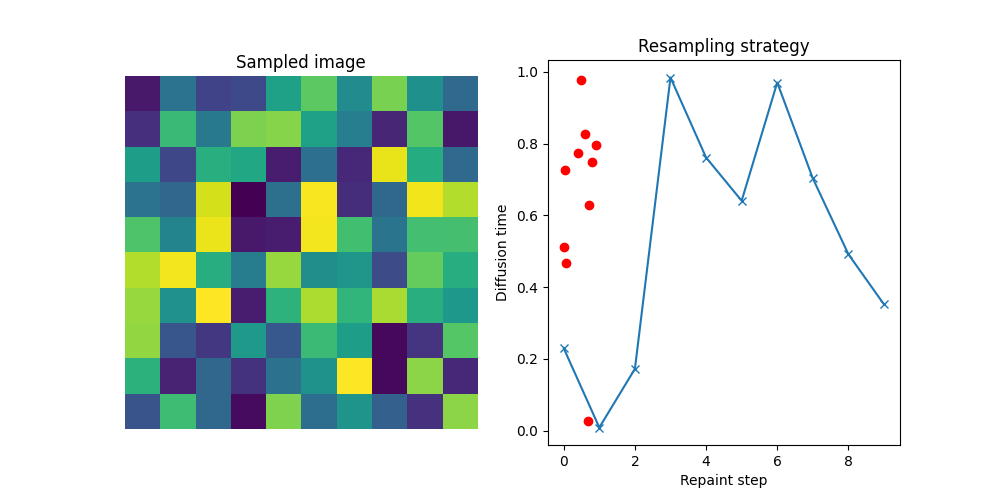

Done


In [5]:
# conf = build_conf("image_size_inet", "inet256", 250, 1, jump_length=6, jump_n_sample=2)
conf = build_conf("image_size_inet", "inet256", 50, 1, jump_length=2, jump_n_sample=2)
p, ani = main(conf)

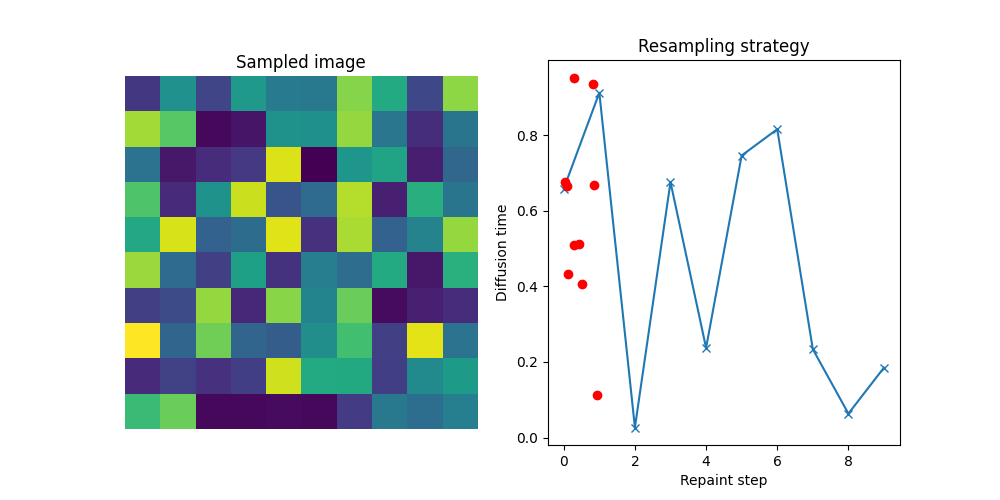

In [13]:
# conf = build_conf("image_size_inet", "inet256", 250, 1, jump_length=6, jump_n_sample=2)
conf = build_conf("image_size_inet", "inet256_thick", 10, 2, jump_length=1, jump_n_sample=10)
p, ani = main(conf)

In [7]:
import numpy as np
def inter(s, g):
    delta = 1 if s < g else -1
    return np.arange(s, g, delta)

def cyc(s, g):
    return conc(inter(s, g), inter(g, s))

def rep(interval, k=2):
    return np.tile(interval, k)

def conc(*args):
    return np.concatenate(args)

print(inter(0, 10))
print(inter(10, 0))
print(cyc(0, 10))
print(conc(inter(0, 10), inter(10, 0)))
print(rep(conc(inter(0, 10), inter(10, 0))))
print(conc(rep(cyc(10, 5), 3), inter(10, -2)))

[0 1 2 3 4 5 6 7 8 9]
[10  9  8  7  6  5  4  3  2  1]
[ 0  1  2  3  4  5  6  7  8  9 10  9  8  7  6  5  4  3  2  1]
[ 0  1  2  3  4  5  6  7  8  9 10  9  8  7  6  5  4  3  2  1]
[ 0  1  2  3  4  5  6  7  8  9 10  9  8  7  6  5  4  3  2  1  0  1  2  3
  4  5  6  7  8  9 10  9  8  7  6  5  4  3  2  1]
[10  9  8  7  6  5  6  7  8  9 10  9  8  7  6  5  6  7  8  9 10  9  8  7
  6  5  6  7  8  9 10  9  8  7  6  5  4  3  2  1  0 -1]


[24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1]


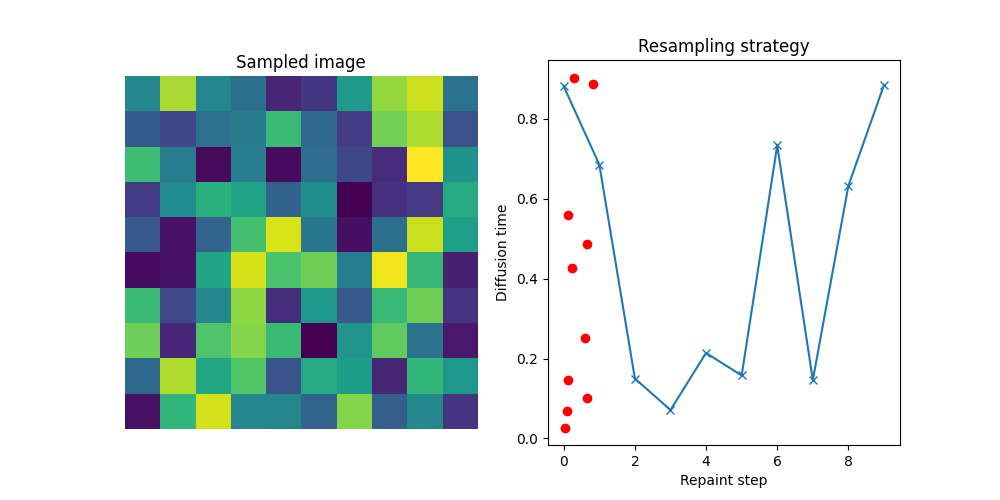

Done


In [8]:
conf = build_conf("image_size_inet", "inet256_thick_middle", 25, 2, jump_length=1, jump_n_sample=1)
conf['manual_times'] = list(conc(rep(cyc(24, 14), 3), inter(24, -2)))#[5,4,3,4,5,4,3,2,1,0,-1]
print(conf['manual_times'])
p, ani = main(conf)

In [8]:
print(list(conc(inter(24, 15), rep(cyc(15, 5), 3), inter(15, -1))))

[24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [6]:
conf = build_conf("image_size_inet", "inet256_thick_middle", 25, 2, jump_length=1, jump_n_sample=1)
conf['manual_times'] = list(conc(inter(24, 10), rep(cyc(10, 0), 3), inter(10, -2)))#[5,4,3,4,5,4,3,2,1,0,-1]
print(conf['manual_times'])
p, ani = main(conf)

NameError: name 'conc' is not defined

In [8]:
stop(p, ani)

# Methods

Paper inspired from [Open AI guided diffusion](https://arxiv.org/pdf/2105.05233.pdf).

### Diffusion model



### Metrics

#### User study

#### LPIPS / FID

## Configuration

In [ ]:
conf_path = 'confs/face_example.yml'
conf_arg = conf_mgt.conf_base.Default_Conf()
conf_arg.update(yamlread(conf_path))

## Resampling schedule

Implement resampling and as a function of the size of the hidden mask

In [ ]:
# start resampling from middle and merge data lately

## Diffusion process step by step

Only 25 passes with classifierg guidance
not working to scheduler 0, 10, ... 250
nor less than 250

## Classifier

Ideas to optimize

- u8 weights
- smaller resolution 64x64

In [ ]:
!pip install lpips

In [12]:
import lpips
import torch as th
loss_fn_alex = lpips.LPIPS(net='alex') # best forward scores

# read png image
file_img0 = 'log/face_example/inpainted/000000.png'
file_img1 = 'log/face_example/inpainted/000000 copy.png'
file_img1 = 'log/face_example/inpainted/000000 copy 2.png'
file_img1 = 'log/face_example/gt/000000.png'
img0 = cv2.imread(file_img0, cv2.IMREAD_UNCHANGED)
img1 = cv2.imread(file_img1, cv2.IMREAD_UNCHANGED)

img0 = th.from_numpy(img0).permute(2, 0, 1).unsqueeze(0).float() / 255
img1 = th.from_numpy(img1).permute(2, 0, 1).unsqueeze(0).float() / 255

d = loss_fn_alex(img0, img1)
print(d)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: c:\Users\PolletStars\Anaconda3\envs\repaint\lib\site-packages\lpips\weights\v0.1\alex.pth
tensor([[[[0.1664]]]], grad_fn=<AddBackward0>)


## Going further

- diffusion model inversion (bigprior) ? DDIM Song and al ?

https://www.youtube.com/watch?v=lvv4N2nf-HU openAI Glide

## Diffusers

In [4]:
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipeline.to("cuda")
pipeline("An image of a squirrel in Picasso style").images[0]

ImportError: 
StableDiffusionPipeline requires the transformers library but it was not found in your environment. You can install it with pip: `pip
install transformers`
